<a href="https://colab.research.google.com/github/ScarletBird/NLP-BeautifulSoup/blob/main/Simple_NLP_with_Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simple activity used in the NLP subject in college, to use BeautifulSoup and make the Lemmatization and Stemming

For the first step, all needed libraries are imported.

In [ ]:
#! pip install nltk

from bs4 import BeautifulSoup # Webscraping
import requests # Webscraping
import nltk # NLP
from nltk.tokenize import RegexpTokenizer # NLP -> tokens
from wordcloud import WordCloud # NLP presentation
import matplotlib.pyplot as plt # NLP presentation
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatization
from nltk import stem # Stemming

# Required downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

For the next step, a website will be choosen to extract the text.

The chosen site was an Apple pie recipe from the following url: https://www.inspiredtaste.net/43362/apple-pie/

In [ ]:
r = requests.get("https://www.inspiredtaste.net/43362/apple-pie/")

c = r.content

soup = BeautifulSoup(c)

#soup # Uncomment to test if there was no interruption from the website

After collecting the page content, the texts wil be extracted, given that there are lots of explanation not only for the recipe, but many other hints as well.

In [ ]:
recipe = soup.find_all('p') #Captura de todo conteúdo envolto pela tag <p>

#recipe # Uncomment to check the content

In [ ]:
recipe_txt = ''
for p in recipe:
  #print(p.text)
  text = (p.text + '\n', '')[not(p.text.strip())] # Here an extra code is made to ignore the skipping line from the page itself, counting only one for the end of each case
  recipe_txt = recipe_txt + text

After gathering the paragraphs text, it will be used for tokenization and be verified which are the top 10 Tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') # Using regex to capture only the words, leaving ponctuation and numbers aside

recipe_tokens = tokenizer.tokenize(recipe_txt)

recipe_tokens_txt = ' '.join(recipe_tokens)

recipe_tokens_txt # Creation of a string with the created tokens for later visualization

'Browse Recipes By Diet By Category By Ingredient Cooking Tips Our favorite recipe for making classic apple pie from scratch This recipe guarantees apple pie with perfectly cooked not mushy apples surrounded by a thickened and gently spiced sauce all baked inside a flaky golden brown crust Jump to the Apple Pie Recipe or watch our quick recipe video showing you how we make it There are also lots of tips in the article below It s taken us a while to zero in on our favorite method for making apple pie but I think we ve finally nailed it This simple recipe guarantees perfectly cooked apples surrounded with a thick gently spiced sauce There s no need for precooking the sauce or apples and the steps to make this pie are simple you just need a little time As with all of the pie recipes on Inspired Taste we start with this homemade pie crust I m a stickler on this one It has never failed us and is our go to recipe for pumpkin pie tarts and other fruit pies like blueberry pie The crust can be 

In [ ]:
def frequencyWord(recipe_tokens):
  frequency_words = nltk.FreqDist(recipe_tokens) # Capture of the frequency of each word to use on the plot
  top10_words = frequency_words.most_common(10) # Top 10 words to show

  print(top10_words)
  frequency_words.plot(10, title='Top 10 palavras') 


  wordcloud = WordCloud(
      stopwords=[], # By default, wordCloud considers English stopwords, so an empty list was used to avoid it
      width = 3000,
      height = 2000,
      background_color = 'grey').generate(recipe_tokens_txt)

  # Wordplot generation to present it
  fig = plt.figure(
      figsize = (20, 15),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

frequencyWord(recipe_tokens)


As noticed, most of the frequent tokens are stopwords, so after removing them, the most common words show up.

In [ ]:
def frequencyWordStopWords(recipe_tokens):
  stopwords = nltk.corpus.stopwords.words('english')

  frequency_words_stop_words = nltk.FreqDist(w.lower() for w in recipe_tokens if w.lower() not in stopwords) # Here the stopwords are removed before being counted, to avoid any confusion
  top10_words = frequency_words_stop_words.most_common(10) # Top 10 words to show

  print(top10_words)
  frequency_words_stop_words.plot(10, title='Top 10 palavras') 

  wordcloud = WordCloud(
      stopwords=stopwords,
      width = 3000,
      height = 2000,
      background_color = 'grey').generate(recipe_tokens_txt)

  # Generate and show wordplot
  fig = plt.figure(
      figsize = (20, 15),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

frequencyWordStopWords(recipe_tokens)

For the next step, the words will be Lemmatized, transforming them into "simple" version of themselves, such as 'apples' will become 'apple'. This will be made before and after removing the stopwords.

In [ ]:
lemmatizer = WordNetLemmatizer()

recipe_tokens_lemmatized = []

for w in recipe_tokens:
  recipe_tokens_lemmatized.append(lemmatizer.lemmatize(w))

In [ ]:
frequencyWord(recipe_tokens_lemmatized)

In [ ]:
frequencyWordStopWords(recipe_tokens_lemmatized)

In both cases there was a growth in the quantity of the word "Apple", specially due to the plural since in the recipe both forms are used a lot.

For the next experiment, the Stemming will be made, using a "basic" form of a word, where 'prodcution' and 'products' will generate 'product', but there are cases where a non-existing worlds will appear, such as 'battl' for 'battling' and 'battles'

In [ ]:
stemmer = stem.SnowballStemmer("english")

recipe_tokens_stemmized = []

for w in recipe_tokens:
  recipe_tokens_stemmized.append(stemmer.stem(w))

[('the', 173), ('pie', 92), ('to', 84), ('a', 77), ('and', 72), ('appl', 61), ('for', 54), ('it', 51), ('of', 49), ('this', 47)]


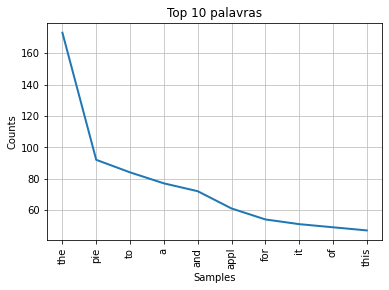

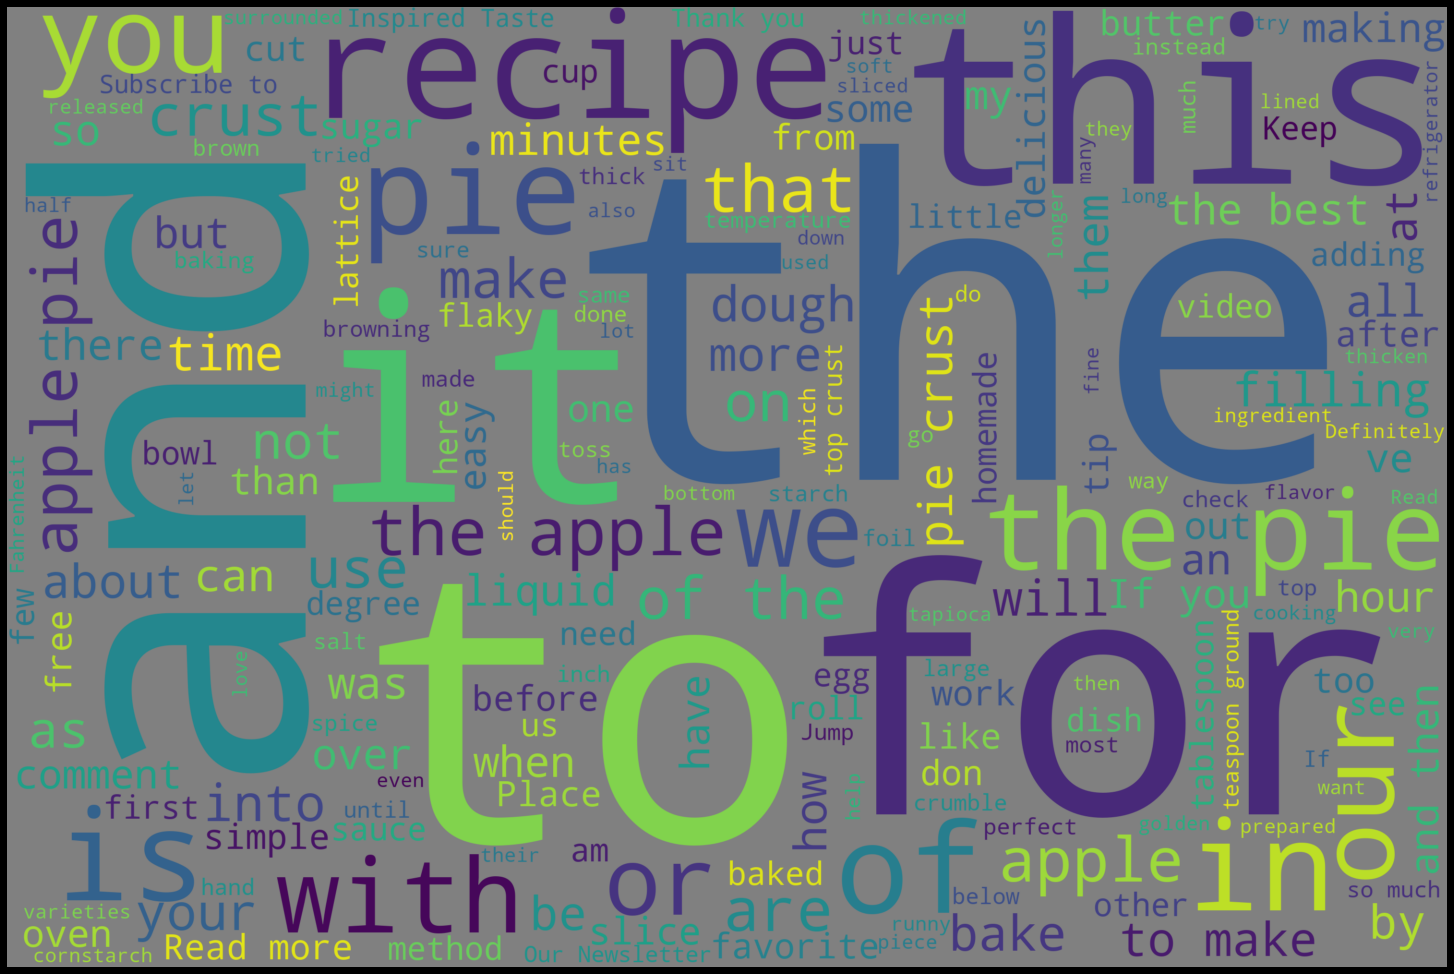

In [ ]:
frequencyWord(recipe_tokens_stemmized)

[('pie', 92), ('appl', 61), ('recip', 45), ('make', 34), ('crust', 33), ('bake', 24), ('use', 21), ('time', 12), ('fill', 12), ('dough', 12)]


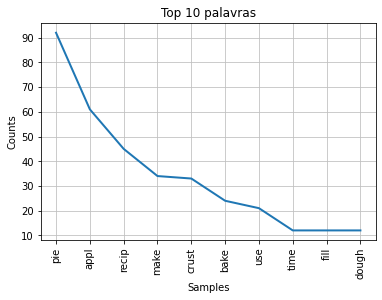

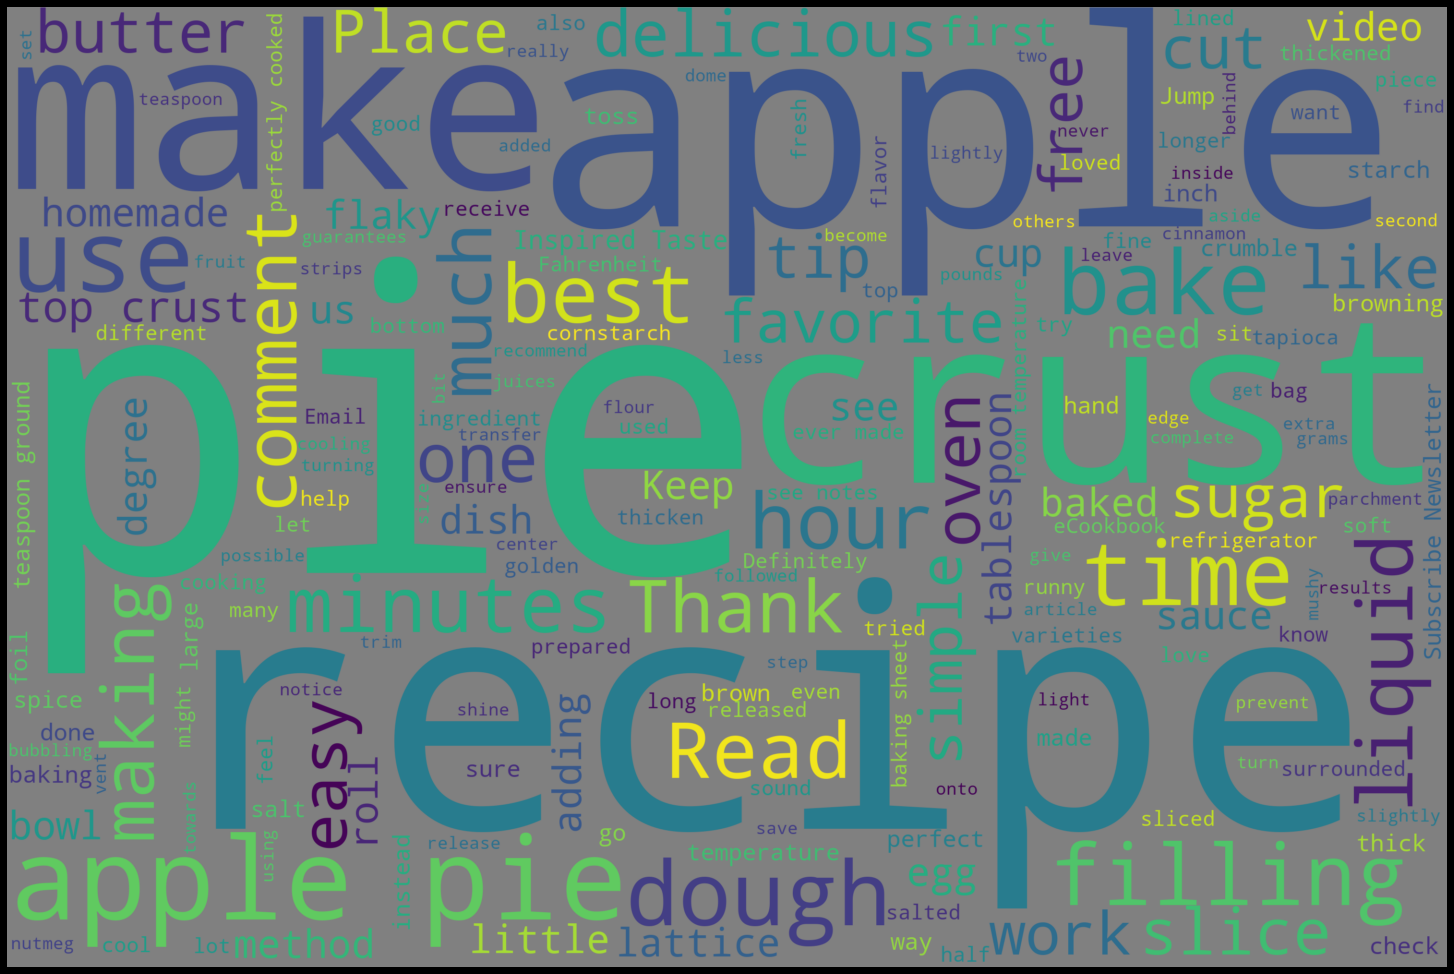

In [ ]:
frequencyWordStopWords(recipe_tokens_stemmized)

In the Stemming, there are words that get extra counts, such as the word 'make' that went from 26 to 32 from Lemmitization to Stemming, most likely due to many conjugation forms of the word, now being counted together in one form.